In [21]:
import tifffile as tfl
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, concatenate, MaxPooling2D
from skimage.transform import resize
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


In [26]:

height=600
width=600
# Define the neural network architecture
inputs = Input(shape=(height, width, 3))  # input with 3 channels
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)

up5 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', use_bias=False, input_shape=(1934, 1896, 128))(conv4)
up5 = concatenate([up5, conv3], axis=3)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up5)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)

up6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', use_bias=False, input_shape=(966, 947, 128))(conv5)
up6 = concatenate([up6, conv2], axis=3)
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)

up7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', use_bias=False, input_shape=(482, 473, 64))(conv6)
up7 = concatenate([up7, conv1], axis=3)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv7)  # Output layer with single channel for segmentation mask

model = Model(inputs=[inputs], outputs=[outputs])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 600, 600, 3)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 600, 600, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)          (None, 600, 600, 32)         9248      ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 300, 300, 32)         0         ['conv2d_24[0][0]']           
 g2D)                                                                                       

In [25]:
def load_and_prepare_data(file_path, target_shape=(7000, 7000)):
    # Load TIFF image data
    img_data = tfl.imread(file_path)
    
    # Resize the image to the target shape
    img_resized = resize(img_data, target_shape, anti_aliasing=True)
    
    # Normalize the pixel values to be in the range [0, 1]
    img_resized = img_resized
    
    return img_resized


In [36]:
file_name1=r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_1\LC08_L2SP_139041_20230828_20230906_02_T1_SR_B3.TIF"
file_name2=r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_1\LC08_L2SP_139041_20230828_20230906_02_T1_SR_B5.TIF"
file_name3=r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_1\LC08_L2SP_139041_20230828_20230906_02_T1_SR_B6.TIF"

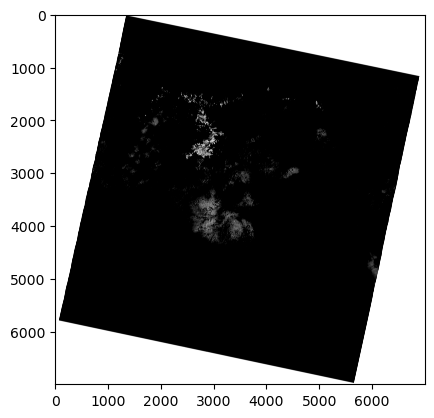

In [35]:
x1=tfl.imread(file_name1)
x2=tfl.imread(file_name2)
x3=tfl.imread(file_name3)
x=resize(x, (7000, 7000), anti_aliasing=True)
plt.imshow(x)

In [3]:
import os
import numpy as np
import imghdr 
x=[]
for i in range(1,11):
    folder_path = r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_{}".format(i)
    image_arrays = []
    for filename in os.listdir(folder_path):
        if imghdr.what(os.path.join(folder_path, filename)) == 'tiff':
            img_array = tfl.imread(os.path.join(folder_path, filename))
            arr_float32 = img_array.astype(np.float32) / 65535
            img_ = (arr_float32 * 255).astype(np.int8)
            #img_array = np.array(img)
            image_arrays.append(img_array)
    #image_stack = np.stack(image_arrays, axis=2)
    plt.imsave(r"C:\Users\jithu\Desktop\out\{}.jpg".format(i), image_arrays)
    x.append(image_stack)
#assert image_stack.shape == (7000, 7000, 3)

In [5]:
import os
import tifffile as tfl
import numpy as np
import matplotlib.pyplot as plt

x = []
for i in range(1, 11):
    folder_path = r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_{}".format(i)
    image_arrays = []
    for filename in os.listdir(folder_path):
        if imghdr.what(os.path.join(folder_path, filename)) == 'tiff':
            img_array = tfl.imread(os.path.join(folder_path, filename))
            arr_float32 = img_array.astype(np.float32) / 65535
            img_ = (arr_float32 * 255).astype(np.int8)
            image_arrays.append(img_)
    image_stack = np.stack(image_arrays, axis=2)
    # Convert the stacked array to a 3D array with shape (height, width, 3)
    image_rgb = np.moveaxis(image_stack, -1, 0)
    plt.imsave(r"C:\Users\jithu\Desktop\out\{}.jpg".format(i), image_rgb)
    x.append(image_rgb)

ValueError: Third dimension must be 3 or 4

In [37]:
y=[]
for i in range(1,11):
    folder_path = r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\y\o_{}".format(i)
    image_arrays = []
    for filename in os.listdir(folder_path):
        if imghdr.what(os.path.join(folder_path, filename)) == 'tiff':
            img_array = tfl.imread(os.path.join(folder_path, filename))
            img_array = np.array(img_array)
            img_array=img_array>0
            img_array=img_array.astype(np.uint8)*255
            plt.imsave(r"c:\Users\jithu\Desktop\train\out\{}.jpg".format(i), img_array)
            #image_arrays.append(img_array)
    #image_stack = np.stack(image_arrays, axis=-1)
    #image_arrays = resize(image_stack, (1934, 1896), anti_aliasing=True)
    #y.append(image_arrays)
#assert image_stack.shape == (7000, 7000, 3)

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0., 0., 0.],
         [0., 0., 0.],
         

In [68]:
batch_size = 1
num_train_samples = x.shape[0]
num_epochs = 10

# Define the train data generator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(x, y, batch_size=batch_size)

# Train the model
model.fit(train_generator, epochs=num_epochs, steps_per_epoch=num_train_samples // batch_size)

# Save the model
model.save('unet_model.h5')

AttributeError: 'list' object has no attribute 'shape'

In [53]:
y

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0., 0., 0.],
         [0., 0., 0.],
         

In [16]:
import os
import numpy as np
import imghdr 
x=[]
for i in range(1,11):
    folder_path = r"C:\Users\jithu\Desktop\Advanced ML Project\dataset\x\in_{}".format(i)
    image_arrays = []
    for filename in os.listdir(folder_path):
        if imghdr.what(os.path.join(folder_path, filename)) == 'tiff':
            img_array = tfl.imread(os.path.join(folder_path, filename))
            img_array = np.array(img_array)
            img_array = (img_array/65535)*255
            img_array =img_array.astype(np.uint8)

            #print(img_array.shape)
            #print(np.max(img_array))
            
            image_arrays.append(img_array)
    image_arrays=np.array(image_arrays)
    image_arrays= np.transpose(image_arrays, (1, 2, 0))
    print(image_arrays.shape)        
    #image_stack = np.stack(image_arrays, axis=2)
    plt.imsave(r"C:\Users\jithu\Desktop\in\{}.jpg".format(i), image_arrays)
    #x.append(image_stack)
   
#image_stack.shape()
#assert image_stack.shape == (7000, 7000, 3)

(7741, 7591, 3)
(7741, 7591, 3)
(7741, 7591, 3)
(7741, 7591, 3)
(7741, 7581, 3)
(7741, 7581, 3)
(7741, 7581, 3)
(7741, 7591, 3)
(7731, 7581, 3)
(7731, 7591, 3)


NameError: name 'image_array' is not defined

In [27]:
# Define data directory
data_dir = r"C:\Users\jithu\Desktop\train"

# Define input and output folders
input_folder = 'in'
output_folder = 'out'

# Define image dimensions
height = 600
width = 600
channels = 3

# Function to load images and masks
def load_data(data_dir, input_folder, output_folder):
    input_images = []
    output_masks = []
    for filename in os.listdir(os.path.join(data_dir, input_folder)):
        if filename.endswith(".jpg"):
            input_path = os.path.join(data_dir, input_folder, filename)
            output_path = os.path.join(data_dir, output_folder, filename)
            input_image = img_to_array(load_img(input_path, target_size=(height, width)))
            output_mask = img_to_array(load_img(output_path, target_size=(height, width), color_mode="grayscale"))
            input_images.append(input_image)
            output_masks.append(output_mask)
    return np.array(input_images), np.array(output_masks)



Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: -32318.2363 - accuracy: 0.0021
Epoch 1: val_loss improved from inf to -1391702.00000, saving model to unet_model.h5
8/8 [==============================] - 17s 2s/step - loss: -32318.2363 - accuracy: 0.0021 - val_loss: -1391702.0000 - val_accuracy: 0.0033
Epoch 2/10


c:\Users\jithu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: -2339463424.0000 - accuracy: 0.0021
Epoch 2: val_loss improved from -1391702.00000 to -43203231744.00000, saving model to unet_model.h5
8/8 [==============================] - 12s 1s/step - loss: -2339463424.0000 - accuracy: 0.0021 - val_loss: -43203231744.0000 - val_accuracy: 0.0033
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: -7073770242048.0000 - accuracy: 0.0021
Epoch 3: val_loss improved from -43203231744.00000 to -87686488522752.00000, saving model to unet_model.h5
8/8 [==============================] - 12s 1s/step - loss: -7073770242048.0000 - accuracy: 0.0021 - val_loss: -87686488522752.0000 - val_accuracy: 0.0033
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: -4675738695368704.0000 - accuracy: 0.0021
Epoch 4: val_loss improved from -87686488522752.00000 to -40711685761138688.00000, saving model to unet_model.h5
8/8 [==============================] - 12s 1s/step - loss: -46757386953687

In [ ]:
# Load data
input_images, output_masks = load_data(data_dir, input_folder, output_folder)

# Normalize input images
input_images = input_images / 255.0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(input_images, output_masks, test_size=0.2, random_state=42)

# Define the neural network architecture
# (your model definition here)

# Compile the model
# (your model compilation here)

# Define model checkpoint to save the best model during training
checkpoint = ModelCheckpoint('unet_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Save the final model
model.save('unet_final_model.h5')

In [30]:
def preprocess_input_image(image_path, target_height, target_width):
    input_image = load_img(image_path, target_size=(target_height, target_width))
    input_image = img_to_array(input_image) / 255.0
    input_image = np.expand_dims(input_image, axis=0)
    return input_image

def predict_mask(model, input_image):
    mask = model.predict(input_image)
    return mask[0]

1/1 [==============================] - 0s 433ms/step


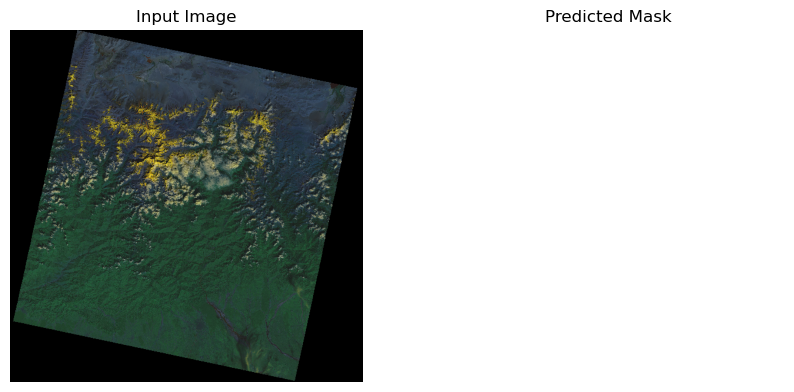

In [31]:
input_image_path = r"c:\Users\jithu\Desktop\train\in\4.jpg"

# Preprocess the input image
input_image = preprocess_input_image(input_image_path, height, width)

# Predict mask
predicted_mask = predict_mask(model, input_image)

# Plot the original image and predicted mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image[0])
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[:, :, 0], cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()

In [33]:
predicted_mask

array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)